✍ В предыдущем юните мы обсудили, зачем снижать размерность данных, а также рассмотрели часто используемый для этого алгоритм — PCA. В данном юните мы изучим ещё два подхода к понижению размерности — **сингулярное разложение (SVD) и cтохастическое вложение соседей с t-распределением (t-SNE)**.

Начнём с сингулярного разложения. SVD используется не только для снижения размерности, но и в целом имеет множество применений в машинном обучении, например, в рекомендательных системах — в одном из следующих модулей вы сможете изучить эту тему подробнее.

Суть сингулярного разложения заключается в следующей теореме ↓

Любую прямоугольную матрицу $A$ размера $(n, m)$ можно представить в виде произведения трёх матриц:

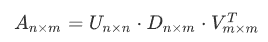

В этой формуле:

+ $U$ — матрица размера $(n, n)$. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются **ортогональными**. Эта матрица содержит нормированные собственные векторы матрицы $AA^T$.
+ $D$ — матрица размера $(n, m)$. На её главной диагонали стоят числа, называемые **сингулярными числами** (они являются корнями из собственных значений матриц $AA^T$ и $A^TA$), а вне главной диагонали стоят нули. Если мы решаем задачу снижения размерности, то элементы этой матрицы, если их возвести в квадрат, можно интерпретировать как дисперсию, которую объясняет каждая компонента.
+ $V$ — матрица размера $(m, m)$. Она тоже ортогональная и содержит нормированные собственные векторы матрицы $A^TA$.

Рассмотрим нахождение сингулярного разложения матрицы на примере ↓

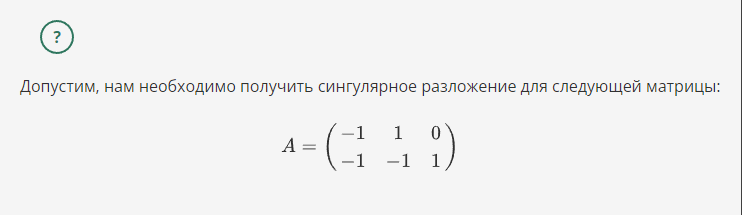

Начнём с поиска матрицы $U$. Для этого нам необходимо сначала вычислить произведение матриц $A$ и $A^T$:

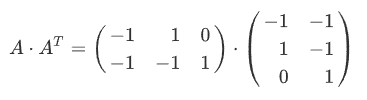

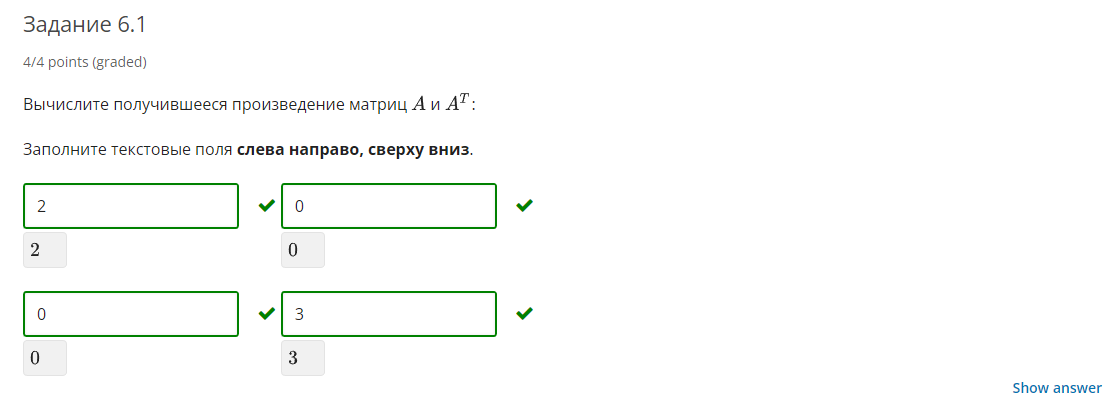
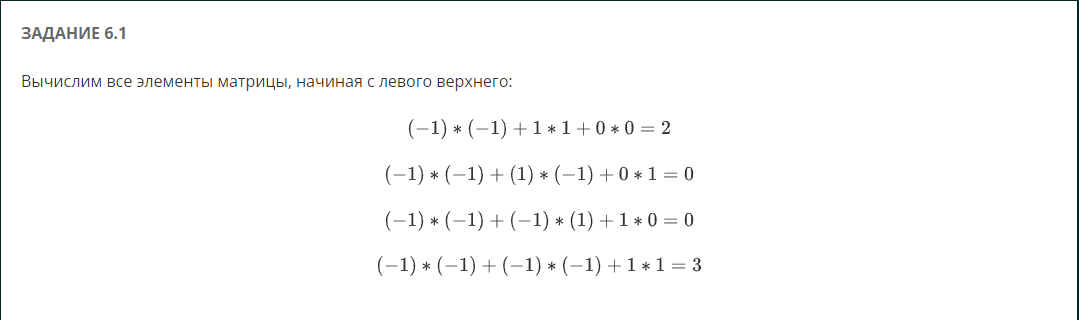

Теперь нам необходимо решить характеристическое уравнение(*уравнение, определяющее собственные значения матрицы*) image.png

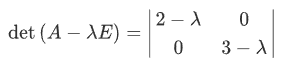

Выражаем значение определителя и приравниваем его к нулю:

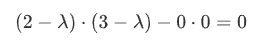

Получаем два собственных значения:

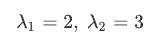

Теперь можно извлечь из них корень и получить сингулярные значения (они нужны для матрицы $D$):

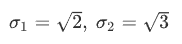

Найдём собственный вектор, который соответствует первому собственному значению. Для этого решим следующее уравнение:

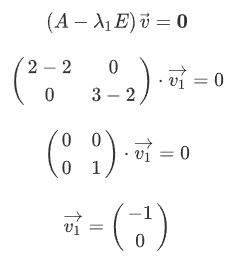

Аналогично получаем второй вектор:

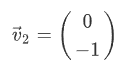

Нормируем их:

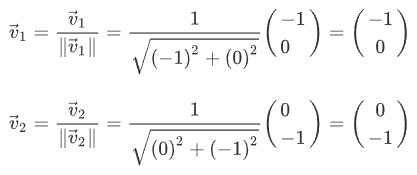

Отлично, мы нашли векторы, чтобы составить матрицу $U$.

Далее для нахождения матрицы $V$ нам необходимо вычислить произведение матрицы $A^T$ на матрицу $A$:

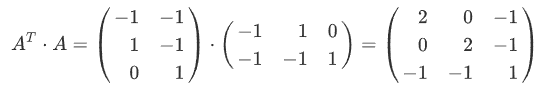

Находим собственные значения для получившейся матрицы:

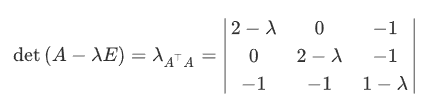

Выражаем определитель и производим элементарные преобразования, чтобы упростить выражение:

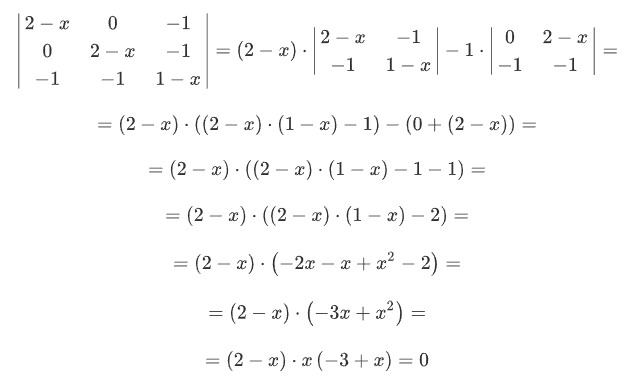

Решая данное уравнение, получаем следующие собственные значения:

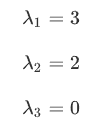

Далее нужно найти сингулярные значения. Для этого просто извлечём корни из собственных значений:

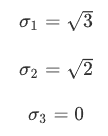

Теперь мы можем составить диагональную матрицу $D$:

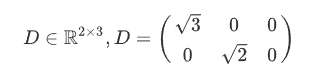

Далее находим собственные векторы:

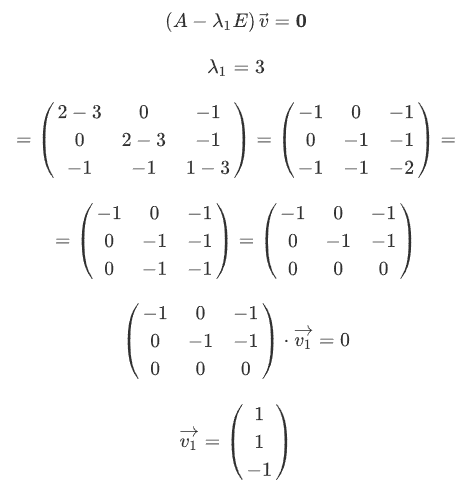

Аналогичным образом находим ещё два собственных вектора. Первый из них (соответствующий собственному значению 2) будет равен $(1, -1, 0)$.

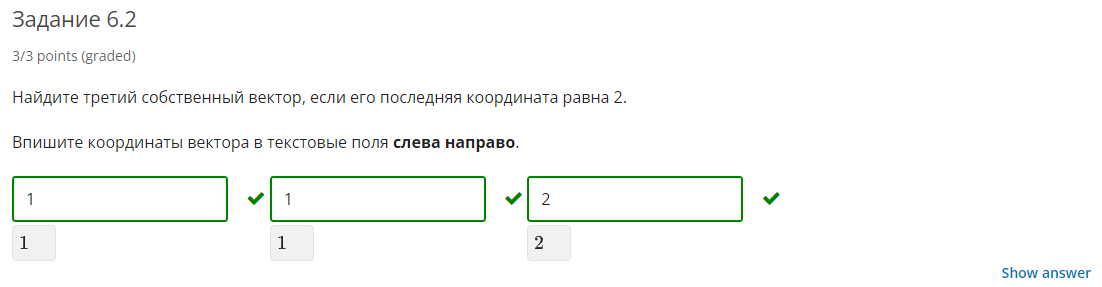
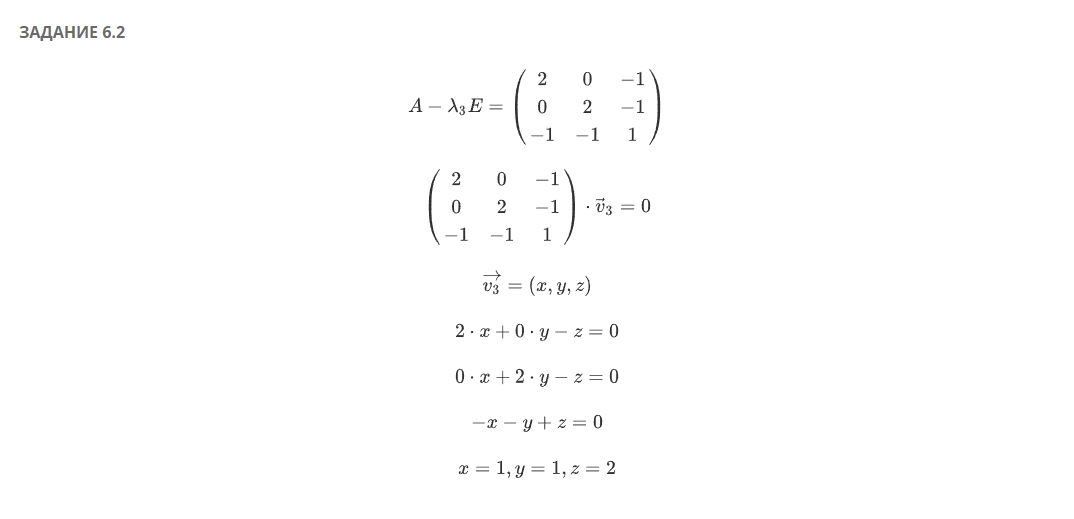

Далее нам необходимо нормировать найденные собственные векторы:

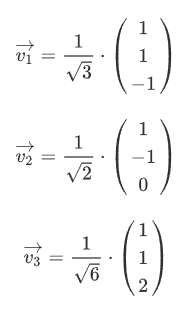

Теперь мы можем записать соответствующую матрицу $V$. Для этого полученные собственные векторы располагаем в столбцах матрицы в порядке убывания их собственных чисел:

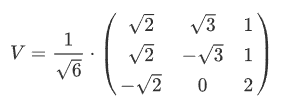

Теперь собираем все полученные матрицы и в итоге получаем следующее сингулярное разложение:

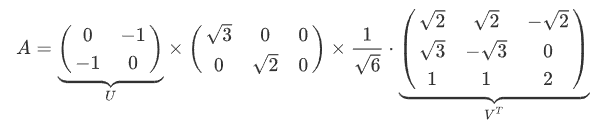

Здесь вы видите полное сингулярное разложение. Однако если мы захотим уменьшить размерность, то можем просто отобрать  наибольших собственных значений и записать разложение для них.

Для того чтобы реализовать сингулярное разложение с помощью библиотеки sklearn, необходимо использовать алгоритм TruncatedSVD(), в который передаётся n_components в качестве параметра, определяющего количество итоговых компонент:



```
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(data)
```



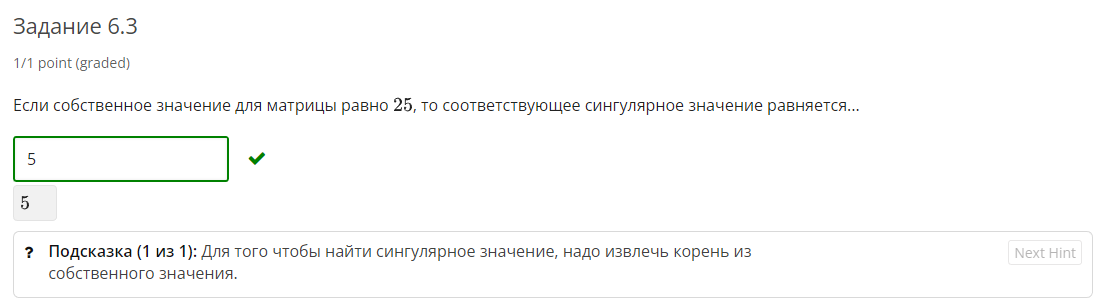

Итак, вы уже знакомы с двумя алгоритмами для понижения размерности — PCA и SVD. Теперь давайте познакомимся с третьим — **t-SNE (стохастическое вложение соседей с t-распределением)**. Его преимущество относительно первых двух заключается в том, что он может реализовывать уменьшение размерности и разделение для данных, которые являются линейно неразделимыми. Подобные данные можно визуализировать так:

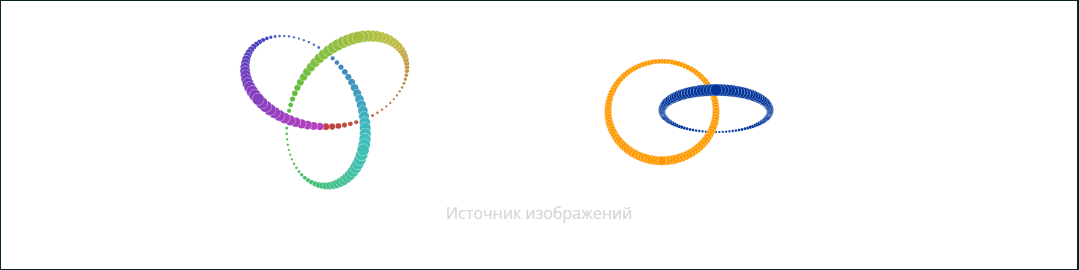

Предположим, что у нас есть набор данных, состоящий из трёх различных классов:

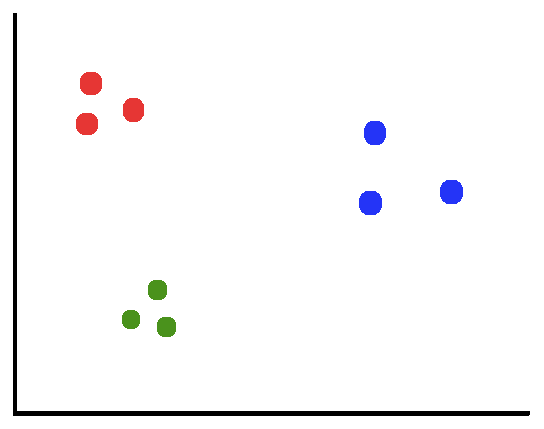

Мы хотим снизить размерность, уменьшив число признаков с двух до одного, сохраняя при этом чёткие границы между кластерами:

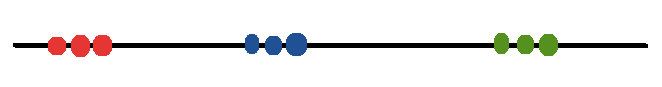

Простая проекция точек на прямую будет плохим вариантом, так как мы потеряем значительный объём информации (на графике ниже можно видеть, что точки, находящиеся далеко друг от друга, на прямой оказываются близко):

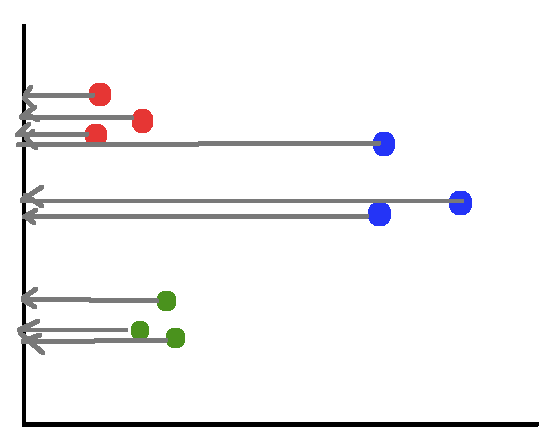

Вместо этого можно использовать технику уменьшения размерности (t-SNE). Первый шаг в алгоритме t-SNE включает в себя измерение расстояния от одной точки до всех остальных. Изначально эти расстояния измеряются с помощью обычного евклидова расстояния, а затем сопоставляются со значениями вероятностей:

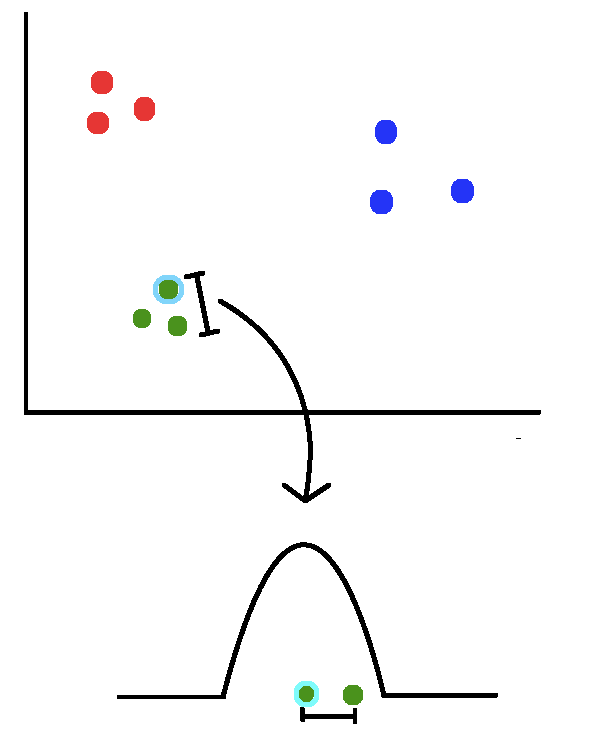

В получившемся распределении точки с наименьшим расстоянием до рассматриваемой точки имеют высокую вероятность быть её соседями, а точки, удалённые от рассматриваемой точки, имеют очень низкие вероятности быть её соседями. По сути, вероятность пропорциональна расстоянию.

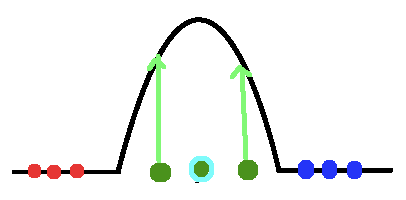

Однако здесь возникает следующая проблема: у разных кластеров разная плотность. Чтобы учитывать информацию об этом, мы будем нормировать каждую вероятность на сумму вероятностей для точек этого кластера:

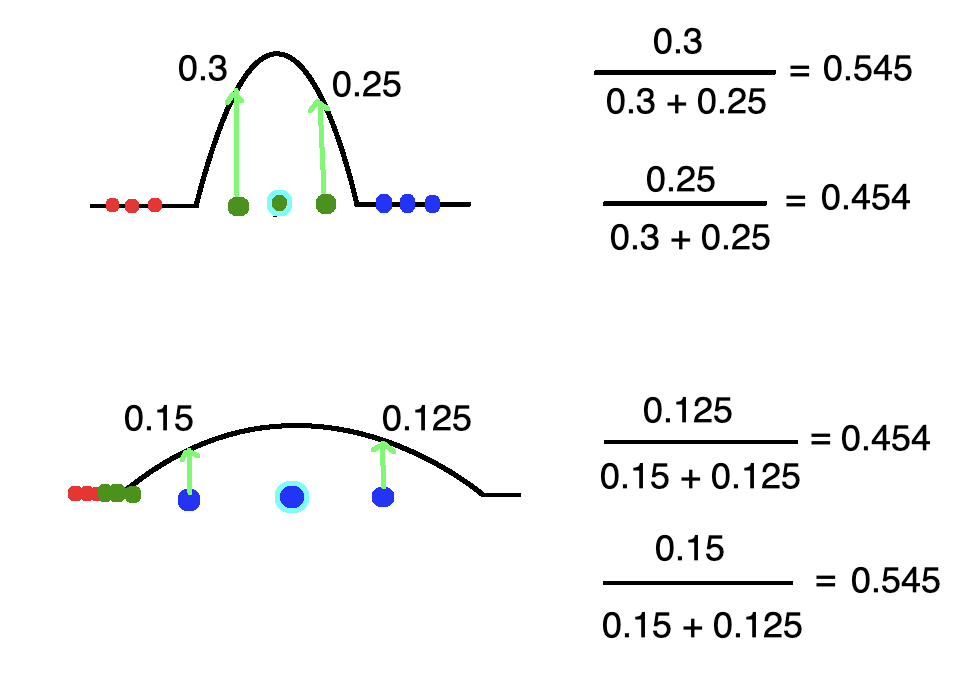

Таким образом, хотя абсолютное (евклидово) расстояние между точками различно, показатель близости для них получается одинаковым.

Давайте попробуем выразить это с помощью математических формулировок.

Вы знаете, что функция плотности для нормального распределения записывается следующим образом:

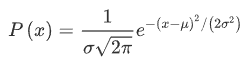

Если мы опустим множитель перед экспонентой, заменим среднее арифметическое на другую точку и отмасштабируем полученное значение, то получим следующее выражение:

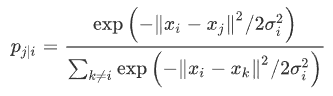

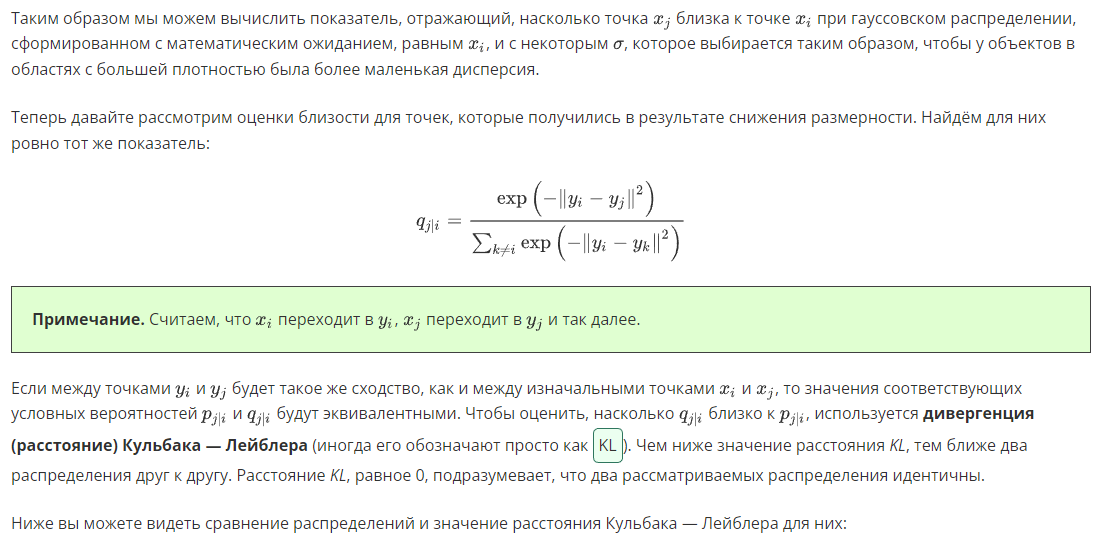
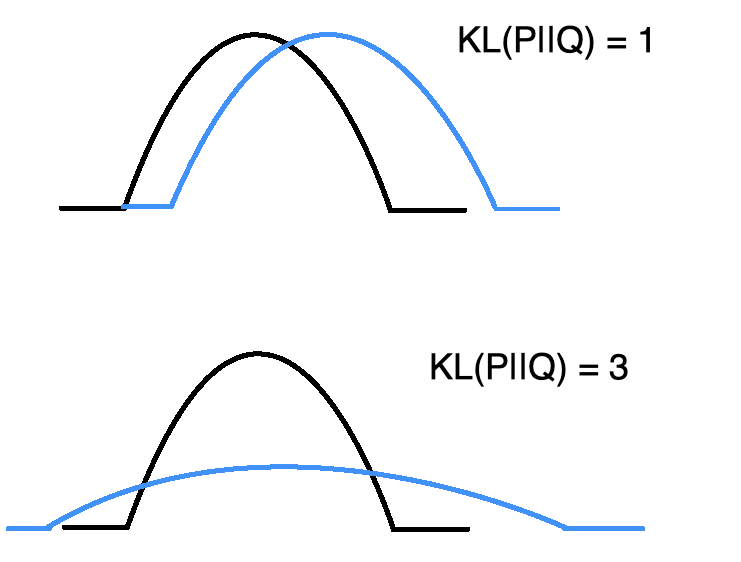

Ранее, для того чтобы найти наиболее подходящую функцию, описывающую наши данные, мы применяли градиентный спуск для минимизации функционала ошибки. Здесь мы будем использовать ту же идею — будем минимизировать KL-расстояние с помощью градиентного спуска. Тогда функция потерь будет выражаться следующим образом:

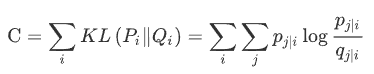

Берём частную производную нашей функции потерь по каждой точке:

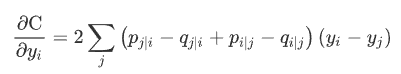

Мы рассмотрели классический вариант SNE, однако при его использовании мы сталкиваемся с проблемой: после снижения размерности расстояние между двумя точками должно быть значительно больше расстояния, которое можно получить в гауссовом распределении. Эту проблему называют **«проблемой скученности»**, и для её решения используют **распределение Стьюдента**. Оно похоже на распределение Гаусса (и для больших выборок практически совпадает с ним), однако имеет большие вероятности на участках, отдалённых от нуля. Сравнение распределений Гаусса и Стьюдента можно увидеть на графике ниже:

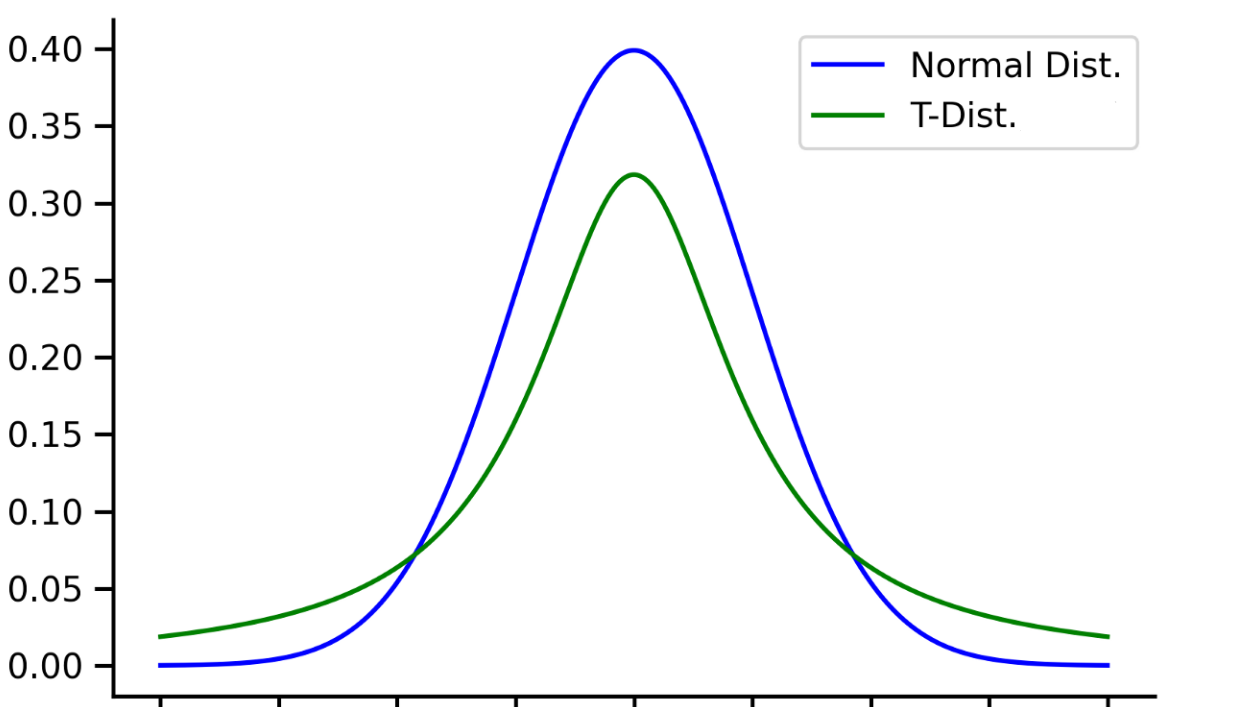

По оси ординат здесь отложены вероятности, а по оси абсцисс — стандартные отклонения.

В t-SNE используется именно распределение Стьюдента. Тогда показатель близости (вероятность) будет вычисляться следующим образом:

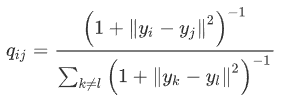

Градиент функции потерь, соответственно, примет следующий вид:

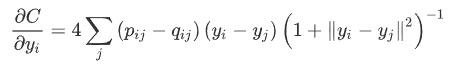


Для реализации t-SNE в sklearn понадобится алгоритм TSNE():



```
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)
```



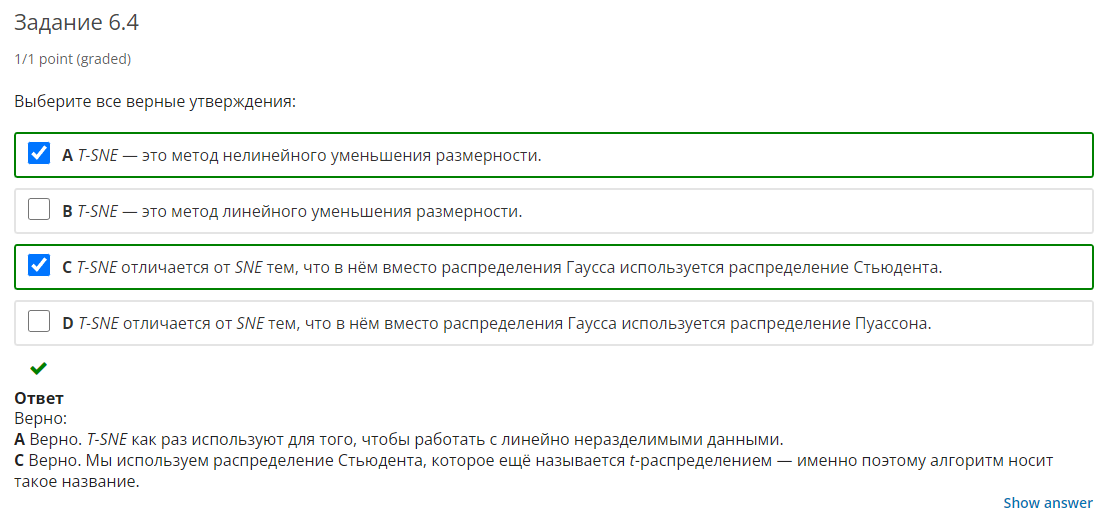

Итак, теперь вы знаете обо всех основных метода снижения размерности. Благодаря этому вы сможете бороться с проклятием размерности, повышать скорость своей работы и улучшать качество результатов при решении задач. Уже в следующем юните у вас появится возможность применить полученные знания на практике →